In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize
import random
import functions
%matplotlib inline

# Loading data
Load data and fix some matlab indexing nonsense


In [2]:
data = loadmat('data/ex4data1.mat')
X, y = data['X'], data['y'].ravel()

y[y == 10] = 0

m = y.size

# Visualize


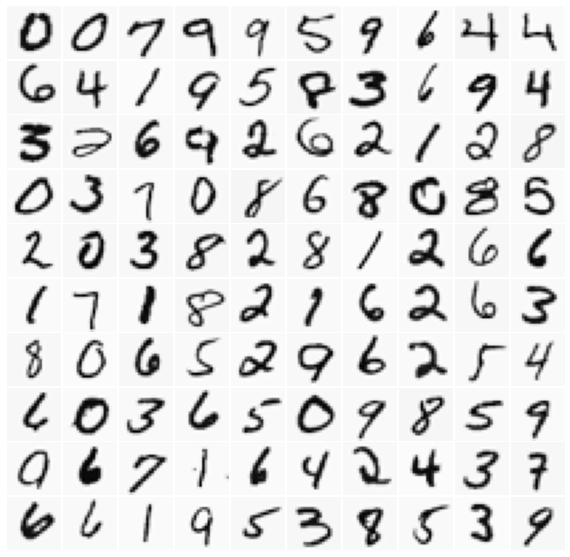

In [3]:
# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

functions.display(sel)

In [4]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 9

# Load the weights into variables Theta1 and Theta2
weights = loadmat(os.path.join('Data', 'ex4weights.mat'))

# Theta1 has size 25 x 401
# Theta2 has size 10 x 26
Theta1, Theta2 = weights['Theta1'], weights['Theta2']

# swap first and last columns of Theta2, due to legacy from MATLAB indexing, 
# since the weight file ex3weights.mat was saved based on MATLAB indexing
Theta2 = np.roll(Theta2, 1, axis=0)

# Unroll parameters 
nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])

In [5]:
lamb = 0
J = functions.nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                   num_labels, X, y, lamb)
print('Cost at paramters loaded from ex4 weights {}'.format(J))
print('The cost should be about                   : 0.287629.')


Cost at paramters loaded from ex4 weights 0.2876291651613189
The cost should be about                   : 0.287629.


In [6]:
# Weight regularization parameter (we set this to 1 here).
lambda_ = 1
J = functions.nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                      num_labels, X, y, lambda_)
grad = functions.nnCostGradient(nn_params, input_layer_size, hidden_layer_size,
                      num_labels, X, y, lambda_)

print('Cost at parameters (loaded from ex4weights): %.6f' % J)
print('This value should be about                 : 0.383770.')
print(grad.size)
print(nn_params.size)

Cost at parameters (loaded from ex4weights): 0.383770
This value should be about                 : 0.383770.
10285
10285


# Gradient evaluation

In [7]:

z = np.array([-1, -0.5, 0, 0.5, 1])
g = functions.sigmoidGradient(z)
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ')
print(g)

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]


# Randomize weights

In [8]:

initial_Theta1 = functions.randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = functions.randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)

# Check NN gradients

In [9]:
functions.checkNNGradients(functions.nnCostGradient, functions.nnCostFunction)

[[-9.27825235e-03 -9.27825236e-03]
 [-3.04978931e-06 -3.04978914e-06]
 [-1.75060084e-04 -1.75060082e-04]
 [-9.62660640e-05 -9.62660620e-05]
 [ 8.89911959e-03  8.89911960e-03]
 [ 1.42869450e-05  1.42869443e-05]
 [ 2.33146358e-04  2.33146357e-04]
 [ 1.17982666e-04  1.17982666e-04]
 [-8.36010761e-03 -8.36010762e-03]
 [-2.59383093e-05 -2.59383100e-05]
 [-2.87468729e-04 -2.87468729e-04]
 [-1.37149709e-04 -1.37149706e-04]
 [ 7.62813550e-03  7.62813551e-03]
 [ 3.69883257e-05  3.69883234e-05]
 [ 3.35320351e-04  3.35320347e-04]
 [ 1.53247082e-04  1.53247082e-04]
 [-6.74798369e-03 -6.74798370e-03]
 [-4.68759742e-05 -4.68759769e-05]
 [-3.76215583e-04 -3.76215587e-04]
 [-1.66560294e-04 -1.66560294e-04]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.64090819e-01  1.64090819e-01]
 [ 1.64567932e-01  1.64567932e-01]
 [ 1.58339334e-01  1.58339334e-01]
 [ 1.51127527e-01  1.51127527e-01]
 [ 1.49568335e-01  1.49568335e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 5.75736494e-02  5.75736493e-02]
 [ 5.77867378e-02  5

# Check with regularization

In [10]:
lamb = 3
functions.checkNNGradients(functions.nnCostGradient, functions.nnCostFunction, lamb=lamb)
debug_J = functions.nnCostFunction(nn_params, input_layer_size,
                          hidden_layer_size, num_labels, X, y, lamb)

print('\n\nCost at (fixed) debugging parameters (w/ lambda = {}): {} '.format(lamb, debug_J))
print('(for lambda = 3, this value should be about 0.576051)')

[[-9.27825235e-03 -9.27825236e-03]
 [-1.67679797e-02 -1.67679797e-02]
 [-6.01744725e-02 -6.01744725e-02]
 [-1.73704651e-02 -1.73704651e-02]
 [ 8.89911959e-03  8.89911960e-03]
 [ 3.94334829e-02  3.94334829e-02]
 [-3.19612287e-02 -3.19612287e-02]
 [-5.75658668e-02 -5.75658668e-02]
 [-8.36010761e-03 -8.36010762e-03]
 [ 5.93355565e-02  5.93355565e-02]
 [ 2.49225535e-02  2.49225535e-02]
 [-4.51963845e-02 -4.51963845e-02]
 [ 7.62813550e-03  7.62813551e-03]
 [ 2.47640974e-02  2.47640974e-02]
 [ 5.97717617e-02  5.97717617e-02]
 [ 9.14587966e-03  9.14587966e-03]
 [-6.74798369e-03 -6.74798370e-03]
 [-3.26881426e-02 -3.26881426e-02]
 [ 3.86410548e-02  3.86410548e-02]
 [ 5.46101547e-02  5.46101547e-02]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.18682669e-01  1.18682669e-01]
 [ 2.03987128e-01  2.03987128e-01]
 [ 1.25698067e-01  1.25698067e-01]
 [ 1.76337550e-01  1.76337550e-01]
 [ 1.32294136e-01  1.32294136e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 3.81928689e-05  3.81928696e-05]
 [ 1.17148233e-01  1

# Train the data
create chorthand functions to make it simpler

In [11]:
lamb = 1
# I don't have to split cost and gradient in the future
# jac = True assumed [J, grad] = costFunction...

costFunc = lambda p: functions.nnCostFunction(p, input_layer_size,
                                        hidden_layer_size,
                                        num_labels, X, y, lambda_)
gradFunc = lambda p: functions.nnCostGradient(p, input_layer_size,
                                        hidden_layer_size,
                                        num_labels, X, y, lambda_)
opts = {'maxiter': 100}

result = minimize(costFunc,
                    initial_nn_params,
                    jac=gradFunc,
                    method='TNC',
                    options=opts)

final_params = result.x

Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                    (hidden_layer_size, (input_layer_size + 1)))

Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                    (num_labels, (hidden_layer_size + 1)))

In [12]:

pred = functions.predict(Theta1, Theta2, X)
print('Training Set Accuracy: %f' % (np.mean(pred == y) * 100))

Training Set Accuracy: 97.520000


# Visualize hidden layer

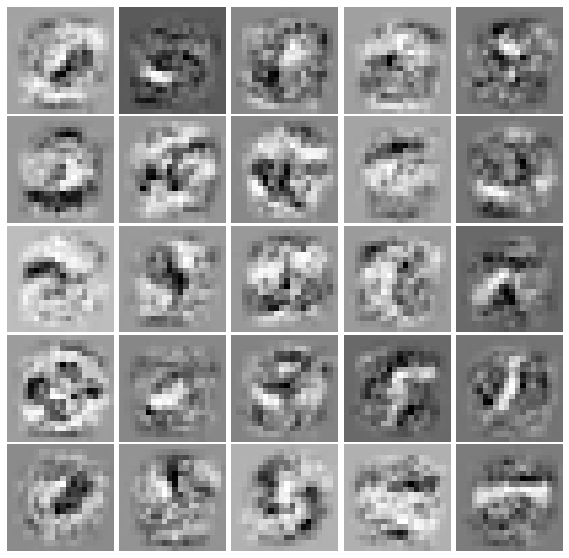

In [13]:
functions.display(Theta1[:,1:])